In [2]:
import ode
import numpy as np
import matplotlib.pyplot as plt

# Fluid Dynamics of Object moving through water

from a object lets say sinking though water there would be 3 forces acting upon it.

1. the Buoyant forces which is $Bf=ρ*Vol*g$
   - p = is the displacement of fluid in this case water which is 1000
   - Vol = is the volume of the object
   - g = is the Gravity which is 9.8

2. the forces involed with what the viscosity of the liquid is $Fu= 6*pi*mu*R*v$
   - mu = is the viscosity of the liquid in this case water which is 1.002
   - R = the radius of the object
   - v = velocity of the object
3. Drag of the liquid $Fd = .5*Cd*p*Ac*v^2$
   - Cd = is the drag coefficent of the object which is determined by the shape of the object
   - p = the displacement of the fluid
   - Ac = cross sectional area
   - v= speed of the object.

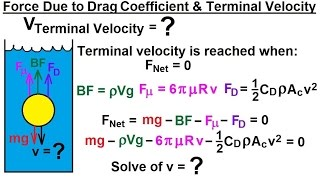

In [7]:
g = 9.8 #N/kg
mu = 1.002 #kg/m/s
r = .15 #
A = np.pi*r**2 #cross-sectional area
Cd = 0.47 #actually depends on speed
m = 113 #kg
p = 1000 #displacement of liquid
Vol = 1.33*np.pi* r**3
v = 20 #m/s
rho = 1.2 #kg/m^3

thetadeg = 25 #deg
vmag0 = 20 #m/s
theta = thetadeg*np.pi/180 #convert deg to rad




since we know what values we are working with the full equation to get the terminal velocity of the object
we implement it as a quadratic equation which is 

$$ (m*g - p*Vol*g) - (6*np.pi*mu*r)v - (1/2*Cd*p*A)v^2=0$$
$$ C````````````````````````B`````````````````````````````A $$

but will swap the formula around like so
$$ 0 = Av^2 + Bv+ C$$

$$x = \frac{ -b \pm \sqrt{b^2 - 4ac}}{2a} $$

In [20]:
Bf = p*Vol*g
Fu = 6*np.pi*mu*r
Fd = 1/2*Cd*p*A

c = m*g - Bf
b = Fu
a = Fd
termv = (-b+np.sqrt(b**2 + 4*a*c))/(2*a)
print (termv)


7.553681277271231


from these calculations we got the terminal velocity in which when the object is sinking or floating it will get in to that terminal velocity.

In [34]:
def viscdrag(d, t):
    """ Calculate and return the derivative of each quantity in an array d at the time t.
    
    Keyword arguments:
    t -- time at the beginning of the time step
    d -- an array of variables at time t
    """
    
    x = d[0]
    y = d[1]
    vx = 0
    vy = d[3]
    
    dxdt = vx
    dydt = vy
    
    v = np.sqrt(vx**2 + vy**2)
    Fdragx = p*Vol*g * vx/v + -1/2*Cd*rho*A*v**2 * vx/v + -6*np.pi*mu*r*v * vx/v
    Fdragy = p*Vol*g * vy/v + -1/2*Cd*p*A*v**2 * vy/v + -6*np.pi*mu*r*v * vy/v
    
    Fgravy= -m*g
    
    Fnetx = Fdragx
    Fnety = Fgravy+Fdragy
    
    dvxdt = Fnetx/m
    dvydt = Fnety/m
    
    derivs = np.array([dxdt, dydt, dvxdt, dvydt])
    
    return derivs

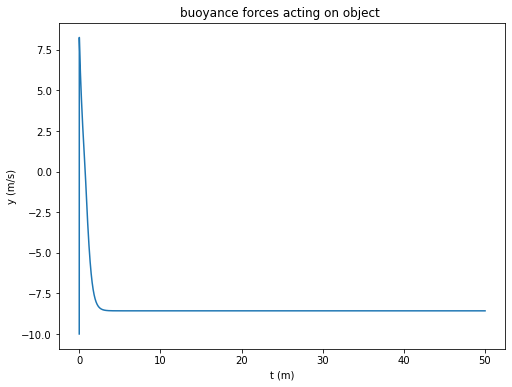

In [38]:
t = 0 #time in s
h = 1e-2 #time step in s

# initial position and velocity components
x = 0
y = -10
vx = 0
vy = vmag0*np.sin(theta)

# lists for storing data to graph
tlist = []
xlist = []
ylist = []
# store initial values
tlist.append(t)
xlist.append(x)
ylist.append(y)
data = np.array([x,y,vx,vy]) 

# compute
while t <= 50:
    
    data = ode.RK4(viscdrag, data, t, h)
    t = t + h
    
    x = data[0]
    y = data[3]
    tlist.append(t)
    xlist.append(x)
    ylist.append(y)
# Plot the trajectory
plt.figure(figsize = (8,6))
plt.title("buoyance forces acting on object ")
plt.xlabel("t (m)")
plt.ylabel("y (m/s)")
plt.plot(tlist, ylist)
plt.show()